<img src="images/JHI_STRAP_Web.png" style="width: 150px; float: right;">
# 01b - Classifiers (15min)

## Table of Contents

1. [Biological Motivation](#motivation)
2. [Performance Metrics and Contingency Tables](#contingency)
3. [Classifier Performance](#performance)
4. [Baseline Frequency](#baseline)
5. [Bayes' Theorem](#bayes)
6. [Real-World Example](#example)
7. [Comments](#comments)

<a id="motivation"></a>
## 1. Biological motivation

<p></p><div class="alert-info">
You are interested in a predicted gene coding region on a newly-sequenced genome, and want to know if its protein product belongs to a particular functional class of proteins (RxLR effector proteins).
<p></p>
You have access to a software tool that *classifies* proteins as `effector` or `not effector`.
</div>

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>If the software tool says that the protein product is an effector, should you believe the prediction?</b>
</div>

<a id="contingency"></a>
## 2. Performance Metrics and Contingency Tables

<p></p><div class="alert-success">
<b>We consider *classifier tools* that whether an input belongs to a *class*, or does not belong to that class. This is a *binary classifier*.</b>
</div>

The performance of *binary classifier tools* is typically measured on a *test set* of data, which can be called a member of the *class* (`positive`) or not a member (`negative`). Calculations of four values can be made:

* **True Positives** (TP): the number of `positive` examples that the classifer correctly assigns as `positive`
* **True Negatives** (TN): the number of `negative` examples that the classifer correctly assigns as `negative`
* **False Positives** (FP): the number of `negative` examples that the classifer incorrectly assigns as `positive`
* **False Negatives** (FN): the number of `positive` examples that the classifer incorrectly assigns as `negative`

These are often represented as *contingency tables* or a *confusion matrix*:

![Confusion Matrix](images/confusion_matrix.png)

These values can be combined into a numer of useful *performance metrics* that summarise the *classifier*'s ability to perform particular tasks.

* **Sensitivity** (Sn, true positive rate, TPR): The proportion of `positive` examples that are correctly classified

$$\textrm{Sensitivity (Sn)} = \frac{\textrm{TP}}{(\textrm{TP} + \textrm{FN})}$$

* **Specificity** (Sp, true negative rate, TNR): The proportion of `negative` examples that are correctly classified

$$\textrm{Specificity (Sp)} = \frac{\textrm{TN}}{(\textrm{FP} + \textrm{TN})}$$

* **False Positive Rate** (FPR, $1 - \textrm{Sp}$): The proportion of `negative` examples incorrectly classed as `positive`.

$$\textrm{FPR} = \frac{\textrm{FP}}{(\textrm{FP} + \textrm{TN})}$$

<p></p><div class="alert-warning">
<b>If you do not have this information, you cannot interpret predictive results!</b>
</div>

<a id="performance"></a>
## 3. Classifier Performance

<p></p><div class="alert-success">
<b>In our example, we assume that our functional classifier that determines whether a protein sequence is likely to be that of an effector has the following *performance metrics*:</b>
</div>

* **Sensitivity**: Sn = 0.95
* **False Positive Rate**: FPR = 0.01

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>Do you think these are good performance characteristics?</b>
</div>

<p></p><div class="alert-info">
<b>The classifier says your protein is an effector!</b>
</div>

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>What is the probability that your protein is really an effector?
<p></p>
<ul>
<li>0.01
<li>0.05
<li>0.50
<li>0.95
<li>0.99
</ul></b>
</div>

<a id="baseline"></a>
## 4. Baseline Frequency

<p></p><div class="alert-success">
<b>Unless you know the baseline occurrence of a class in the set of inputs, you cannot calculate the probability that the classifier is correct in any particular case.</b>
</div>

Denoting the *baseline occurrence*, or *baseline frequency* (the proportion of all proteins that are effectors) with which a protein may be an effector as $f_{x}$: 

 $$f_{x} = 0.01 \implies P(\textrm{effector}|\textrm{+ve}) = 0.490 \approx 0.5$$
 $$f_{x} = 0.8 \implies P(\textrm{effector}|\textrm{+ve}) = 0.997 \approx 1.0$$
 
<p></p><div class="alert-warning">
<b>If effectors are *rare*, the functional classification is more likely to be false</b>
</div>

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (2min)

<p></p><div class="alert-danger">
<b>You run the classifier tool on 20,000 proteins from your favourite organism. You expect around 200 of these proteins to be effectors.</b>
<p></p>
<b>What is the approximate probability that any individual classification is correct?</b>
<p></p>
<b>BONUS: Approximately how many positive classifications would you expect?</b>
</div>

<a id="bayes"></a>
## 5. Bayes' Theorem

<p></p><div class="alert-success">
<b>The relatively low probability of any classification being correct, even if the classifier has excellent performance metrics, can be counterintuitive. But we can always understand the statistics using Bayes' Theorem</b>
</div>

With:

* $P(\textrm{positive})$ = the expected proportion of `positive` examples (the *baserate*)
* $P(\textrm{negative})$ = the expected proportion of `negative` examples
* $P(+|\textrm{positive})$ = the probability the classifier calls `positive`, if the example is `positive` (TPR, Sn)
* $P(+|\textrm{negative})$ = the probability the classifier calls `positive`, if the example is `negative` (FPR)

The probability that an example is `positive`, given the classifier says that it is `positive` is $P(\textrm{positive}|+)$ and can be calculated:

$$P(\textrm{positive}|+) = \frac{P(+|\textrm{positive})P(\textrm{positive})}{P(+|\textrm{positive})P(\textrm{positive}) + P(+|\textrm{negative})P(\textrm{negative})}$$

<p></p><div class="alert-warning">
<b>We can visualise how the probability of a positive classification being correct ($P(\textrm{eff}|\textrm{pos})$) varies with baserate, using the Python code in the cell below:</b>
</div>

Populating the interactive namespace from numpy and matplotlib


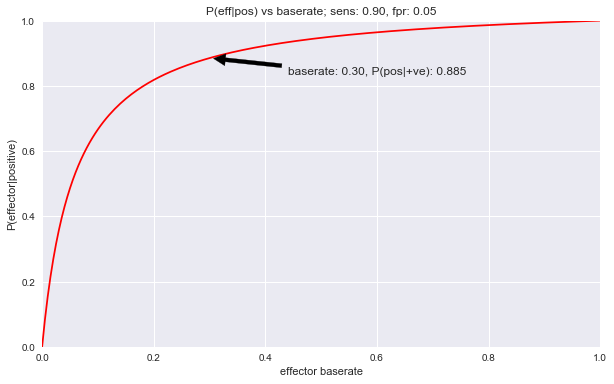

In [1]:
# Import Python libraries
%pylab inline
import seaborn as sns         # This produces pretty graphical output
import tools.classifier as tc # This lets us plot some classifer-specific visualisation

# Define sensitivity and FPR
sn = 0.90    # sensitivity
fpr = 0.05   # false positive rate

# Define baserate (frequency of positive examples)
baserate = 0.3

# Static plot of 
tc.plot_prob_effector(sn, fpr, baserate);

In the plot above, we see the effector classifier's response curve (red line) as a function of baserate, assuming it has a 90% *sensitivity*, and a 5% *false positive rate*.

The black arrow points at a particular response rate - when the baserate of positives in the population is 30%. At this point, any positive classification has about 89% probability of really being a positive example.

<p></p><div class="alert-warning">
* So long as about 20% of all proteins are effectors, the classifier predictions are correct about 80% of the time.
* As the baserate drops below about 7%, predictions are more likely to be incorrect, rather than correct.
</div>

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (4min)

<p></p><div class="alert-danger">
<b>What is the probability that a positive result from our fictional classifier (Sn=0.95, FPR=0.01) is correct, with baserate 0.01?</b>
<p></p>
<b>What if the sensitivity falls to 90%, and the FPR increases to 5%?</b>
</div>

<p></p><div class="alert-success">
<b>In the cell below you can see code that renders an interactive version of the plot above, which allows you to vary the sensitivity, false positive rate, and baserate of positive examples using sliders. You can also zoom in to the left-hand region of the graph for clarity.</b>
</div>

<a id="example"></a>
## 6. Real-World Example

<p></p><div class="alert-info">
In their 2009 paper, Arnold *et al.* describe a tool to predict bacterial Type III effector proteins called `EffectiveT3`. This tool is reported with sensitivity 71% and selectivity 85% (thus FPR is 15%).
</div>

* [Arnold *et al.* (2009) "Sequence-based prediction of type III secreted proteins" *PLoS Pathog.* 5 e1000376 doi:10.1371/journal.ppat.1000376](http://dx.doi.org/10.1371/journal.ppat.1000376)

In their paper, the authors identify hundreds of type III effectors in genomes that possess no annotated type III secretion system (over 10% of the complete protein complement, in some cases). They note:

> The surprisingly high number of (false) positives in genomes without TTSS exceeds the expected false positive rate (Table 1) and thus raised questions about their nature.

<img src="images/exercise.png" style="width: 50px; float: left;">
### QUESTION:  (4min)

<p></p><div class="alert-danger">
<b>What is the expected probability that a positive prediction from `EffectiveT3` is really a type III effector, given that *Pseudomonas syringae* possesses fewer than 100 effectors in a 5000-gene genome (baserate <≈ 3%)?</b>
<p></p>
Why do you think the authors saw so many likely false positives?
<p></p>
How do you think you might be able to improve the probability that a positive prediction/classification is a real positive example, when making predictions/classifying all proteins on a genome?
</div>

In [2]:
# Import Python libraries
from ipywidgets import interact, FloatSlider  # for interactive widgets

# Define sensitivity and FPR
sn = 0.90    # sensitivity
fpr = 0.05   # false positive rate

# Define baserate (frequency of positive examples)
baserate = 0.3

# Create an interactive plot 
interact(tc.plot_prob_effector,
         sens=FloatSlider(min=0.01, max=0.99, step=0.01, value=sn), 
         fpr=FloatSlider(min=0.01, max=0.99, step=0.01, value=fpr),
         baserate=FloatSlider(min=0.01, max=0.99, step=0.01, value=baserate),
         xmax=FloatSlider(min=0.1, max=1, step=0.1, value=1));

<a id="comments"></a>
## 7. Comments

### 1. Predictions/Classifiers Identify Groups, Not Individuals

Predictors and classifiers identify groups of positive/negative examples, not individual members of the group. For example, if a test for smugglers at an airport has $P(\textrm{smuggler}|+) = 0.9$ and 100 potential smugglers are identified, how do we tell which 10 smugglers are wrongly identified? We always need more evidence to distinguish within the predicted group members.

### 2. Stratification Can Improve Classifier Performance

If there are a set of criteria that an example must meet in order to be a member of a class, then excluding all examples that do not meet these criteria reduces the scope for false positives, and raises the *baserate*, increasing the probability that a positive classification implies a positive example.